<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [127]:
sns.__version__

'0.9.0'

In [139]:
dataset = pd.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [140]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [141]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [142]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es categórica, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


Empiezo con la limpieza que hice de los datos. Ver si hace falta de acuerdo a hecho en los puntos anteriores

In [223]:
brief_cols = [
    'year', 'ISO_code', 'countries', 'region',
    'pf_identity',
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [224]:
cl_dataset = dataset[important_cols]

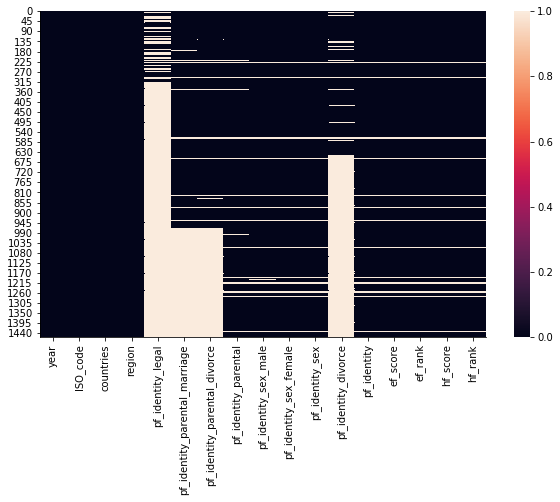

In [225]:
plt.figure(figsize=(10,6))
sns.heatmap(cl_dataset.isna())
sns.despine()

Descardo algunas columnas debido a que la maoyria de sus datos son nan

In [226]:
drop_cols = ['pf_identity_legal', 'pf_identity_parental_marriage', 
             'pf_identity_parental_divorce', 'pf_identity_divorce',
            'pf_identity_parental']
cl_dataset.drop(drop_cols, axis=1, inplace=True)

/home/franco/anaconda3/envs/diplodatos/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


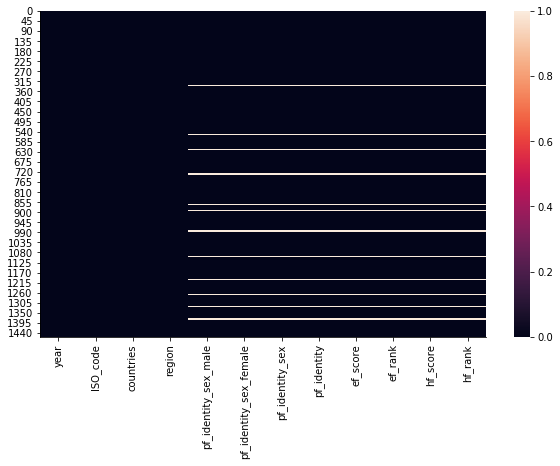

In [227]:
plt.figure(figsize=(10,6))
sns.heatmap(cl_dataset.isna())
sns.despine()

In [228]:
print(cl_dataset.shape)
print(cl_dataset.dropna().shape)

(1458, 12)
(1375, 12)


Solamente una pequeña parte de los datos se pierde si descartamos los datos nan

In [229]:
cl_dataset.dropna(inplace=True)

/home/franco/anaconda3/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
latins_countries = cl_dataset[cl_dataset["region"] == "Latin America & the Caribbean"]

Por pruebas en otro notebook se que Venezuela es un outlier en latinoamerica. Lo saco del dataset

In [231]:
latin_mask = ((latins_countries["countries"] != "Venezuela"))
cl_latin = latins_countries[latin_mask]


In [232]:
brief_cl_ds    = cl_dataset[brief_cols]
brief_cl_latin = cl_latin[brief_cols]

<Figure size 1152x720 with 0 Axes>

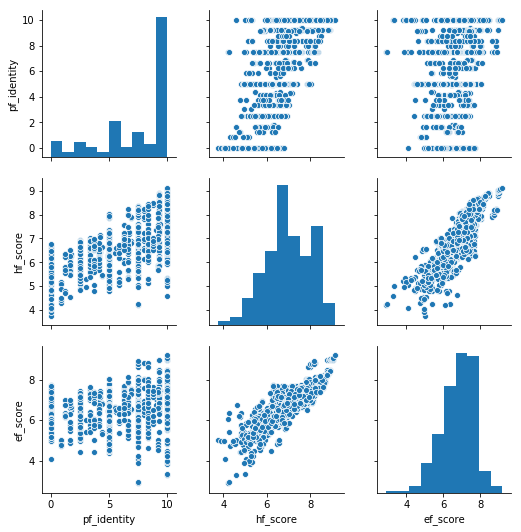

In [233]:
plt.figure(figsize=(16,10))
sns.pairplot(brief_cl_ds[["pf_identity", "hf_score", "ef_score","region"]])


<Figure size 1152x720 with 0 Axes>

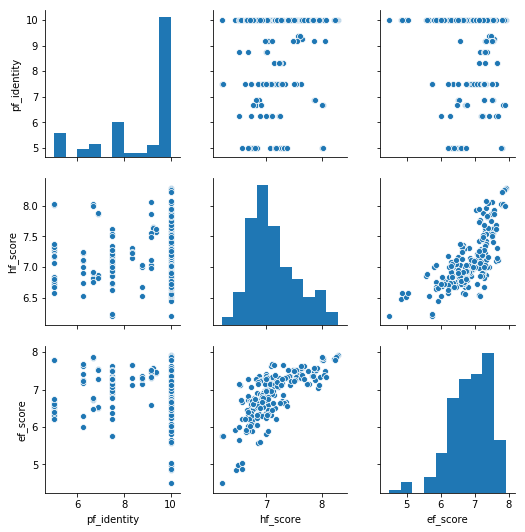

In [234]:
plt.figure(figsize=(16,10))
sns.pairplot(brief_cl_latin[["pf_identity", "hf_score", "ef_score"]])


PAra poder ver la relación con más detalle, hago nuevos gŕaficos usando una regresión lineal para fitear los datos

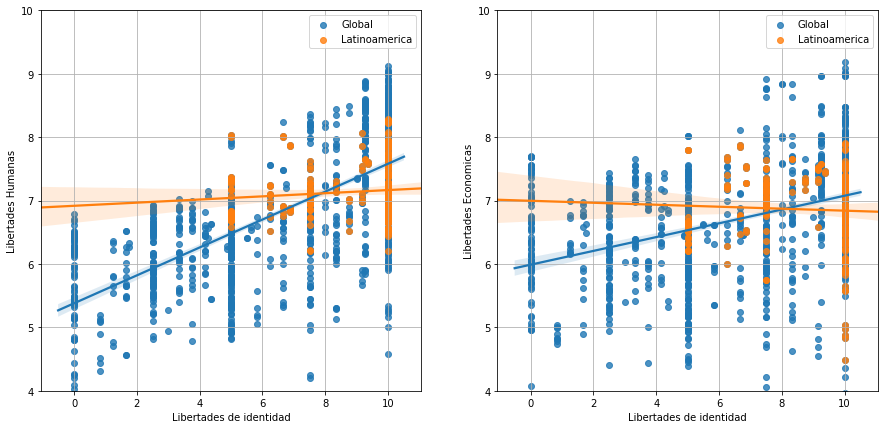

In [235]:
plt.figure(figsize=(15,7))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(1, 2, idx+1)
    sns.regplot(x="pf_identity", y=var, 
                data=brief_cl_ds, 
                label="Global")
    sns.regplot(x="pf_identity", y=var, data=brief_cl_latin, label="Latinoamerica")
    plt.grid()
    plt.ylim([4,10])
    plt.xlabel("Libertades de identidad")
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")
    plt.legend(loc=0)

A partir de estos gráficos, necesitamos hacer 2 analisis diferentes, uno para lo que pasa globalmente y otro para lo que pasa en Latinoamerica.
Se puede ver que mundialmente las libertades de identidad  estan bien correlacionadas positivamente con el indice de libertad humana y las libertades ecónomicas. Las pendientes de las rectas obtenidas en la regresión lineal, indican que la correlación de las libertades de identidad es mayor con el indice de libertades humanas. A priori uno esperaría un resultado este ya que la libertad de identidad es un indicador más que esta más relacionado a lo humano que a lo ecónomico.

Algo diferente ocurre en latinoamerica, donde las variables estan correlacionadas debilmente e incluso existe una correlación negativa entre la libertad de identidad y las libertades económicas. Esta correlación negativa puede deberse a que en latinoamerica la variable libertades de identidad es mayor o igual 5. Vemos como es la correlación de las variables en el mundo cuando miramos solo en ese rango


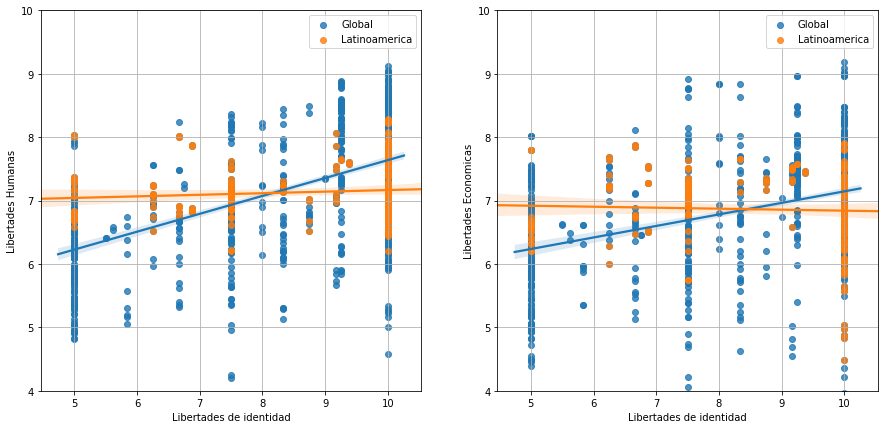

In [236]:
plt.figure(figsize=(15,7))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(1, 2, idx+1)
    sns.regplot(x="pf_identity", y=var, 
                data=brief_cl_ds[brief_cl_ds["pf_identity"]>=5], 
                label="Global")
    sns.regplot(x="pf_identity", y=var, data=brief_cl_latin, label="Latinoamerica")
    plt.grid()
    plt.ylim([4,10])
    plt.xlabel("Libertades de identidad")
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")
    plt.legend(loc=0)

Podemos ver que la tendencia se mantiene. Antes de establecer una colcusión vamos a calcular el valor númerico de cada correlación para corroborar lo que vemos gráficamente

Como las variables NO estan distribuidas normalmente, no es posible utilizar la correlación con el metodo de Spearman. Lo vamos a analizar con el metodo de Kendall que es apto para variables ordinales, de intervalo o de razon.

Para el mundo es

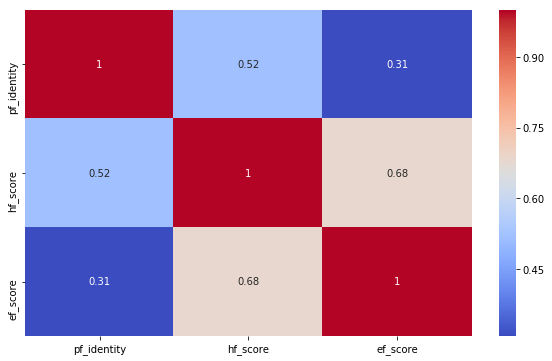

In [237]:
plt.figure(figsize=(10,6))
sns.heatmap(brief_cl_ds[["pf_identity", "hf_score", "ef_score"]].corr(method="kendall"), 
            annot=True, cmap="coolwarm")

Mientras que en latinoamerica tenemos

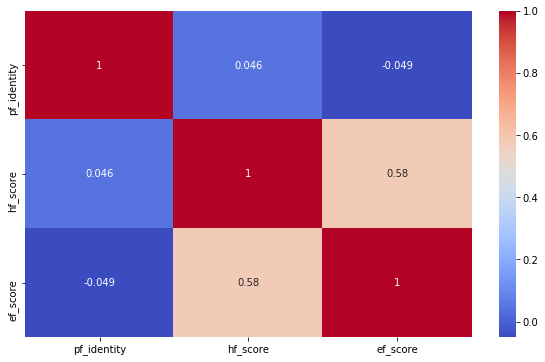

In [238]:
plt.figure(figsize=(10,6))
sns.heatmap(brief_cl_latin[["pf_identity", "hf_score", "ef_score"]].corr(method="kendall"), 
            annot=True, cmap="coolwarm")

De esta forma corroboramos lo que vimos gráficamente, lo que se observa a nivel global es diferente de lo que se ve en latinoamerica en cuanto a las relaciones entre las libertades de identidad con las libertades humanas y economicas. Las mismas son mucho más dependientes a nivel mundial que en latinoamerica

Finalmente, como la region es una variable categórica no podemos establecer una correlación numérica entre ella y las libertades humanas y económicas. Vamos a usar boxplots para ver como varian estas variables en las diferentes regiones

In [246]:
brief_cl_ds["region"].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

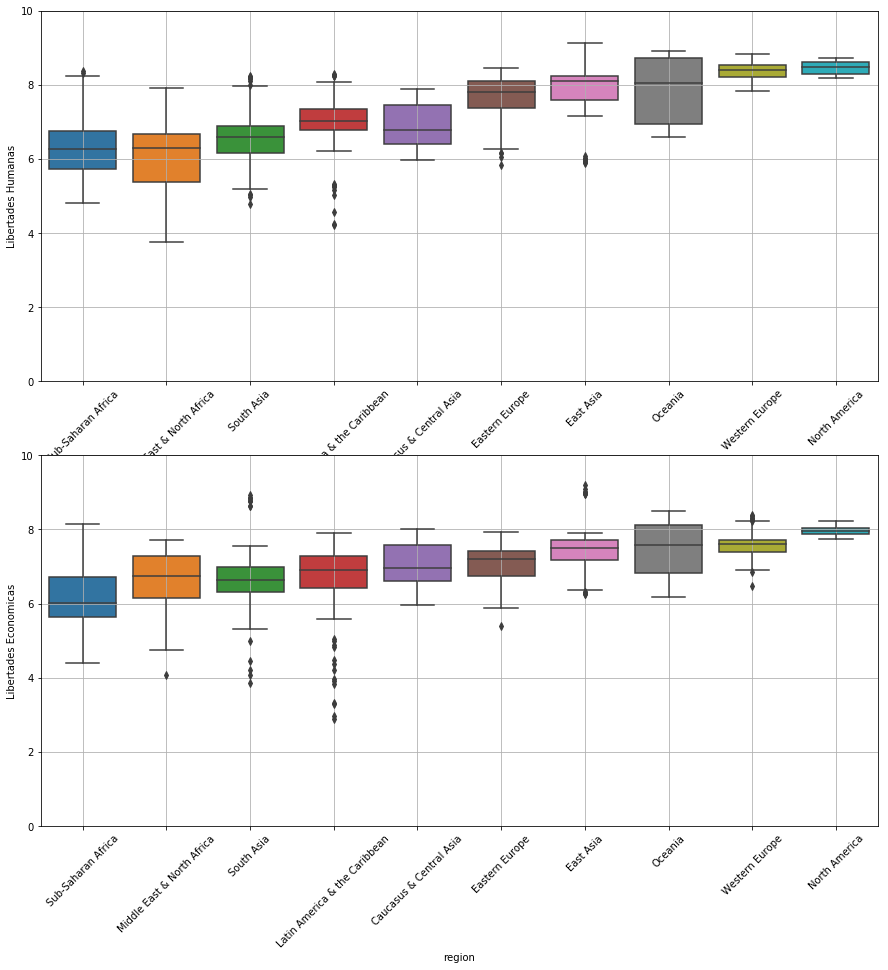

In [251]:
plt.figure(figsize=(15,15))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(2, 1, idx+1)
    sns.boxplot(x="region", y=var, data=brief_cl_ds, order=poorest_to_reach_order)
    plt.xticks(rotation=45)
    plt.ylim([0,10])
    plt.grid()
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")



El grafico asi como está no nos dice mucho ya que las regiones no estan ordenadas de acuerdo a ningún patrón. Veamos que pasa cuando ordenamos aproximadamente las regiones de más pobres a más ricas, o de tercer mundistas a primer mundistas

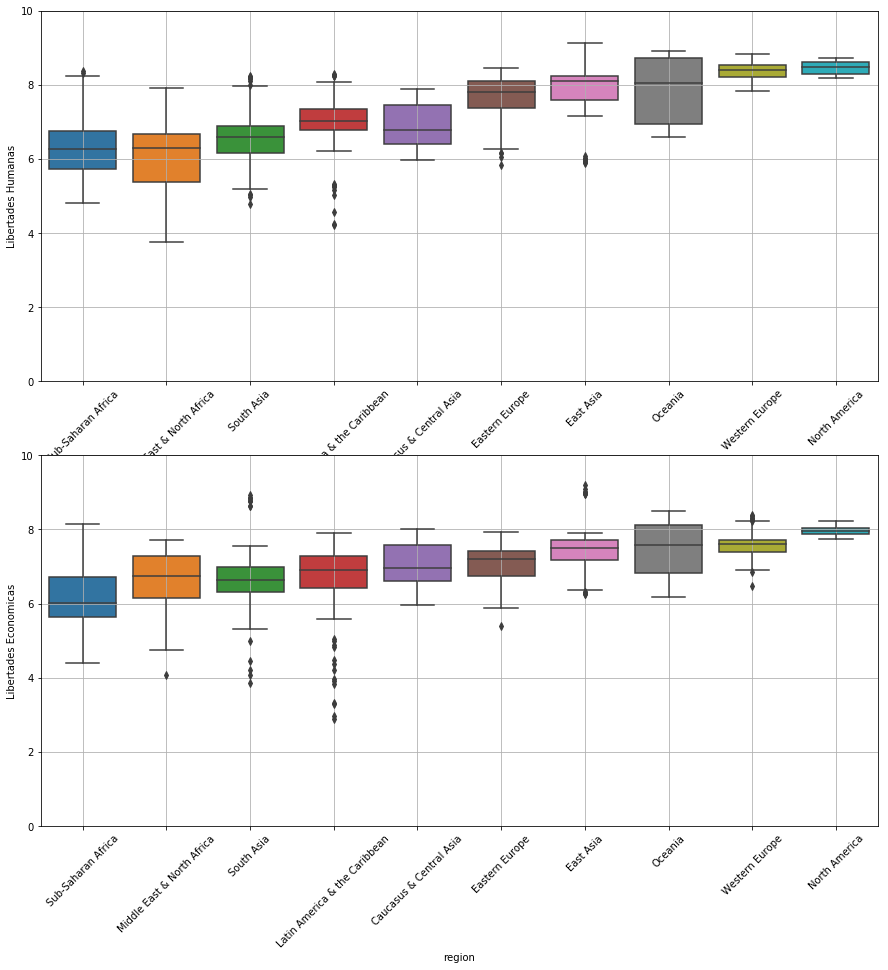

In [255]:
poorest_to_reach_order = ['Sub-Saharan Africa','Middle East & North Africa',                          'South Asia',
                          'Latin America & the Caribbean','Caucasus & Central Asia',
                          'Eastern Europe', 'East Asia','Oceania', 'Western Europe',
                          'North America']
plt.figure(figsize=(15,15))
for idx, var in enumerate(["hf_score", "ef_score"]):
    plt.subplot(2, 1, idx+1)
    sns.boxplot(x="region", y=var, data=brief_cl_ds, order=poorest_to_reach_order,
               #hue="year"
               )
    plt.xticks(rotation=45)
    plt.ylim([0,10])
    plt.grid()
    if var == "hf_score":
        plt.ylabel("Libertades Humanas")
    else:
        plt.ylabel("Libertades Economicas")


Así, podemos destacar que los países o regiones con economias más fuertes o prosperas muestran más libertades económicas y humanas